In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import load_boston 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
import statsmodels.formula.api as smf
boston = load_boston() 
bos = pd.DataFrame(boston.data) 

In [2]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos.columns=boston.feature_names

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos['MEDV']=boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.isnull().sum()


## No null values present

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
bos['CHAS'].head(100)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: CHAS, Length: 100, dtype: float64

In [12]:
columns=bos.columns

In [13]:
columns=columns.drop(['CHAS','MEDV'])

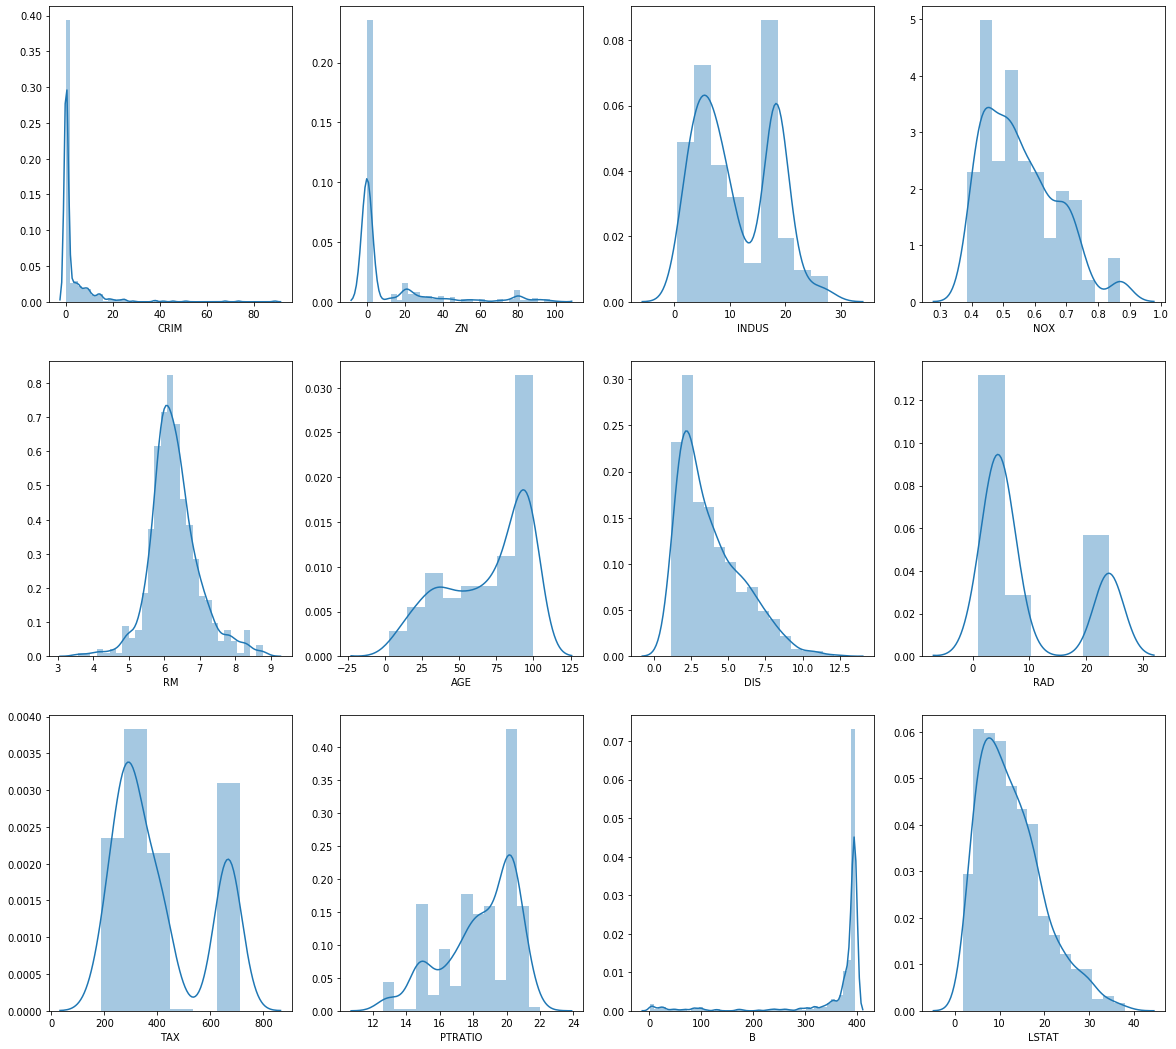

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[col])
        plt.xlabel(col)
    plotnumber+=1
plt.show()

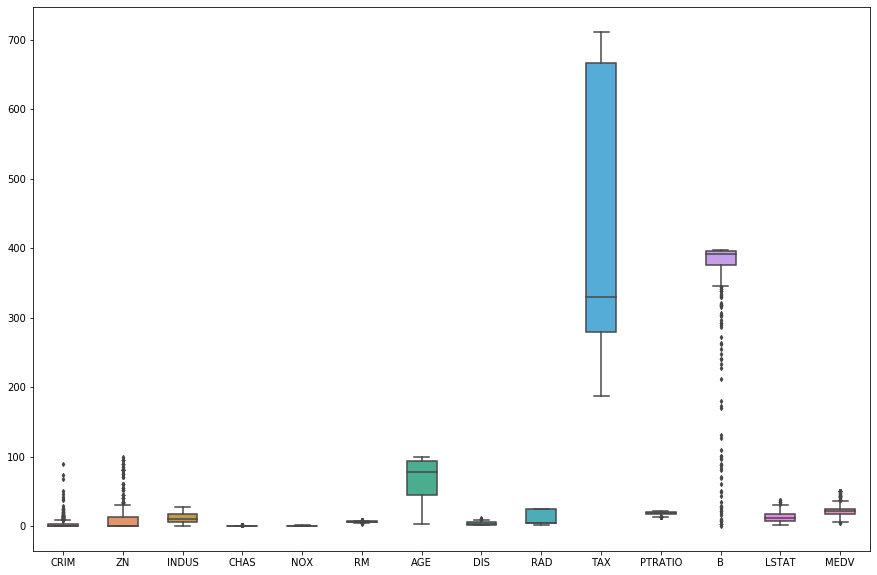

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

In [16]:
print(bos['CRIM'].mean())
print(bos['CRIM'].std())

3.6135235573122535
8.601545105332487


In [17]:
def limit_imputer(value):
    if(value>upper_limit):
        return upper_limit
    elif(value<lower_limit):
        return lower_limit
    else:
        return value

In [18]:
for col in columns:
    mean=bos[col].mean()
    std=bos[col].std()
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    bos[col]=bos[col].apply(limit_imputer)

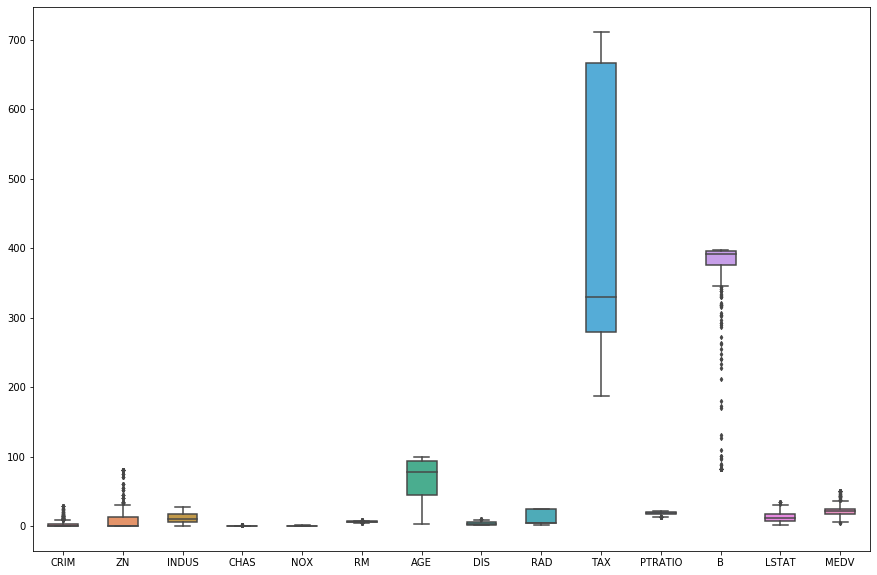

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

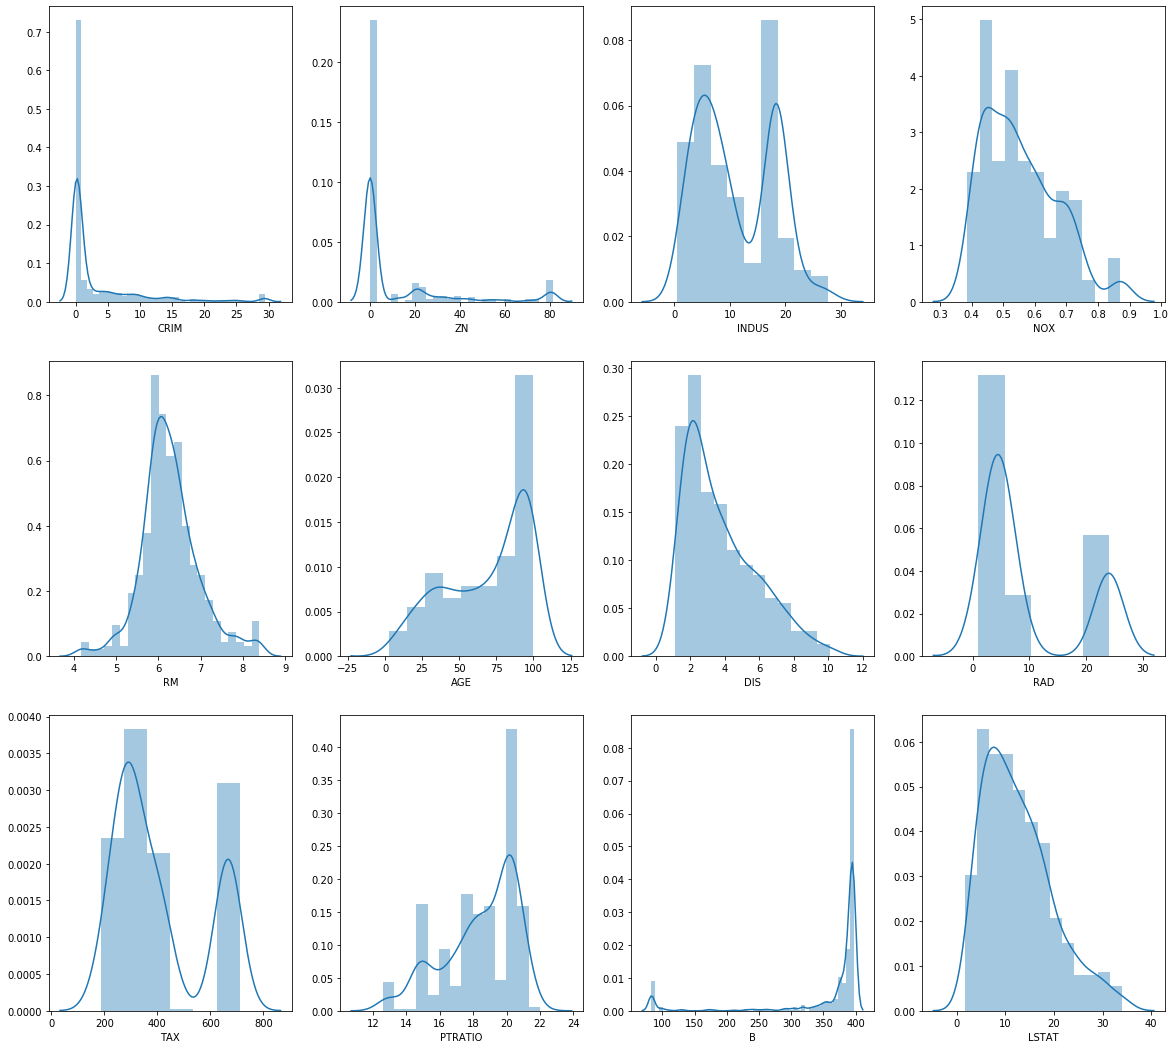

In [20]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[col])
        plt.xlabel(col)
    plotnumber+=1
plt.show()

In [21]:
bos['ZN'] = bos['ZN'].replace(0,bos['ZN'].median())

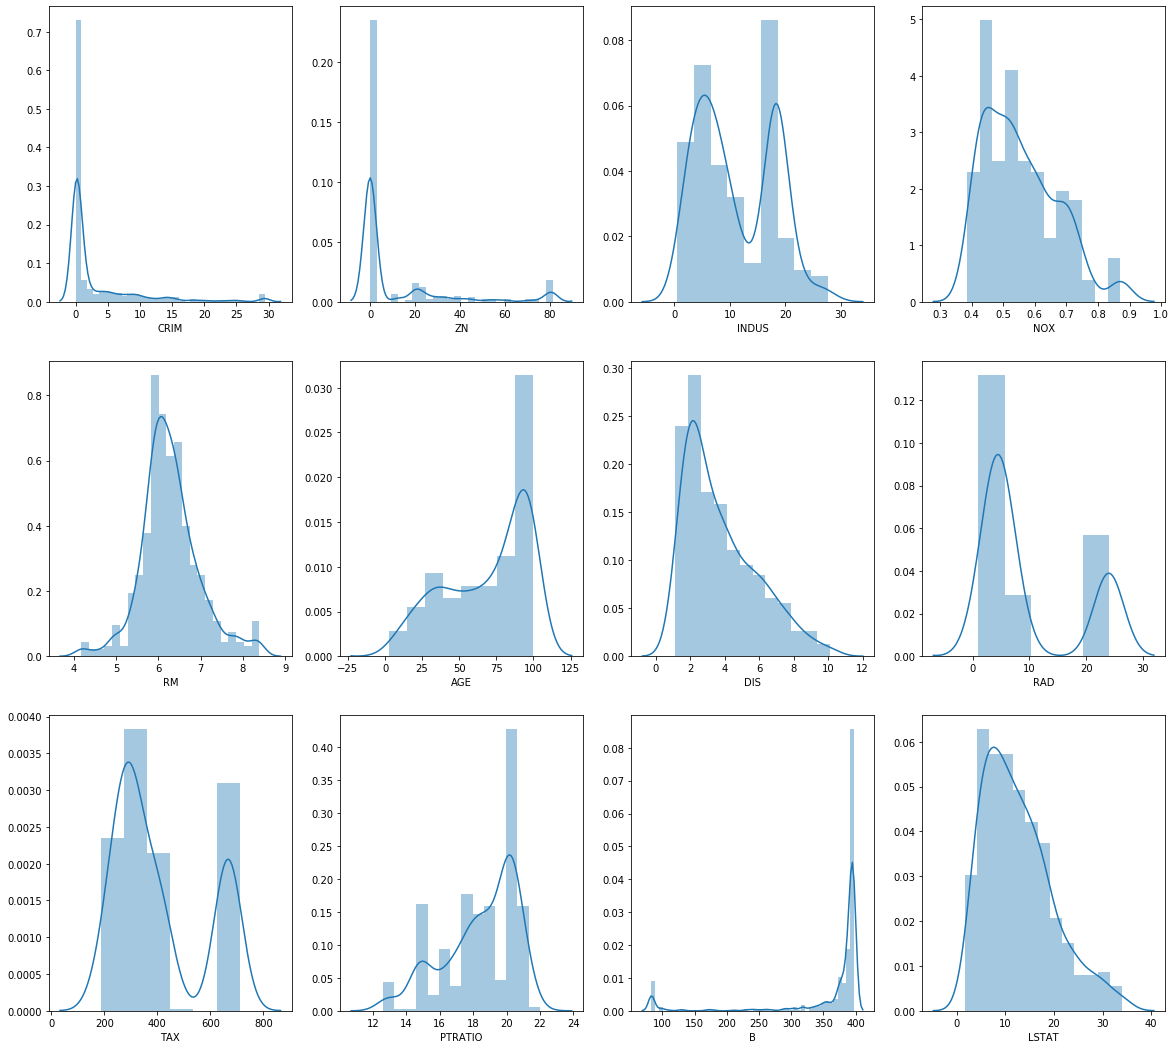

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[col])
        plt.xlabel(col)
    plotnumber+=1
plt.show()

In [23]:
## B,TAX,AGE,ZN has been removed because the p value which I found from the ols model is very less

X=bos.drop(columns=['MEDV','B','TAX','AGE','ZN'])
y=bos['MEDV']

In [24]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [25]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,2.941375,CRIM
1,3.231245,INDUS
2,1.054569,CHAS
3,4.087164,NOX
4,1.835958,RM
5,2.883344,DIS
6,3.626839,RAD
7,1.613464,PTRATIO
8,2.704599,LSTAT


In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)


In [27]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
regression.score(x_train,y_train)

0.7173321231010406

In [29]:
regression.score(x_test,y_test)

0.743950793026571

In [30]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
lm = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD+ TAX + PTRATIO+ B + LSTAT', data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.44e-135
Time:                        21:58:00   Log-Likelihood:                -1497.2
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     492   BIC:                             3082.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2082      5.234      6.727      0.000      24.925      45.491
CRIM          -0.1597      0.061     -2.626      0.009      -0.279      -0.040
ZN             0.0433      0.014      3.024      0.003       0.015       0.071
INDUS          0.0188      0.061      0.306      0.760      -0.102       0.140
CHAS           2.7020      0.860      3.143      0.002       1.013       4.391
NOX          -17.7394      3.829     -4.633      0.000     -25.262     -10.216
RM             3.9980      0.429      9.309      0.000       3.154       4.842
AGE           -0.0017      0.013     -0.126      0.900      -0.028       0.024
DIS           -1.5035      0.206     -7.315      0.000      -1.907      -1.100
RAD            0.3120      0.070      4.450      0.000       0.174       0.450
TAX           -0.0119      0.004     -3.165      0.002      -0.019      -0.005
PTRATIO       -0.9644      0.131     -7.380      0.000      -1.221      -0.708
B              0.0102      0.003      3.372      0.001       0.004       0.016
LSTAT         -0.5141      0.052     -9.815      0.000      -0.617      -0.411
==============================================================================
Omnibus:                      180.168   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.749
Skew:                           1.533   Prob(JB):                    1.46e-176
Kurtosis:                       8.386   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
lm = smf.ols(formula='MEDV ~ CRIM + INDUS + CHAS + NOX + RM + DIS + RAD  + PTRATIO  + LSTAT', data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 26 May 2021   Prob (F-statistic):          5.75e-134
Time:                        21:56:39   Log-Likelihood:                -1511.2
No. Observations:                 506   AIC:                             3042.
Df Residuals:                     496   BIC:                             3085.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7504      5.039      7.888      0.000      29.849      49.651
CRIM          -0.1654      0.061     -2.705      0.007      -0.285      -0.045
INDUS         -0.0789      0.056     -1.397      0.163      -0.190       0.032
CHAS           3.1506      0.871      3.616      0.000       1.439       4.863
NOX          -20.2515      3.760     -5.386      0.000     -27.639     -12.864
RM             4.0648      0.424      9.593      0.000       3.232       4.897
DIS           -1.3105      0.176     -7.443      0.000      -1.656      -0.965
RAD            0.1390      0.047      2.949      0.003       0.046       0.232
PTRATIO       -1.0782      0.126     -8.527      0.000      -1.327      -0.830
LSTAT         -0.5386      0.050    -10.773      0.000      -0.637      -0.440
==============================================================================
Omnibus:                      166.268   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.998
Skew:                           1.440   Prob(JB):                    7.25e-147
Kurtosis:                       7.861   Cond. No.                         770.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""